<a href="https://colab.research.google.com/github/unihong/MS-AI-School/blob/main/20230510_ML_keras_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import reuters
(train_data, train_labels),(test_data, test_labels) = reuters.load_data(num_words=10000)

2110848/2110848 [==============================] - 1s 0us/step


In [ ]:
print(train_data.shape)
print(test_data.shape)

(8982,)
(2246,)


In [ ]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))

  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1
  
  return results

In [ ]:
# 훈련데이터와 테스트 데이터의 벡터 변환 
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
# 라벨 데이터를 카테고리 데이터로 전환 
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [ ]:
# 모델 구성
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [ ]:
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [ ]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [ ]:
history = model.fit(partial_x_train, 
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 3s 123ms/step - loss: 2.9830 - accuracy: 0.4756 - val_loss: 2.0094 - val_accuracy: 0.6250
Epoch 2/20
16/16 [==============================] - 2s 100ms/step - loss: 1.6339 - accuracy: 0.6773 - val_loss: 1.4354 - val_accuracy: 0.6830
Epoch 3/20
16/16 [==============================] - 1s 59ms/step - loss: 1.2246 - accuracy: 0.7344 - val_loss: 1.2201 - val_accuracy: 0.7270
Epoch 4/20
16/16 [==============================] - 1s 61ms/step - loss: 0.9974 - accuracy: 0.7864 - val_loss: 1.1201 - val_accuracy: 0.7600
Epoch 5/20
16/16 [==============================] - 1s 58ms/step - loss: 0.8258 - accuracy: 0.8251 - val_loss: 1.0245 - val_accuracy: 0.7840
Epoch 6/20
16/16 [==============================] - 1s 61ms/step - loss: 0.6987 - accuracy: 0.8479 - val_loss: 0.9540 - val_accuracy: 0.7990
Epoch 7/20
16/16 [==============================] - 1s 60ms/step - loss: 0.5913 - accuracy: 0.8763 - val_loss: 0.9222 - val_accuracy: 0.7990
Epoch 8/20


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

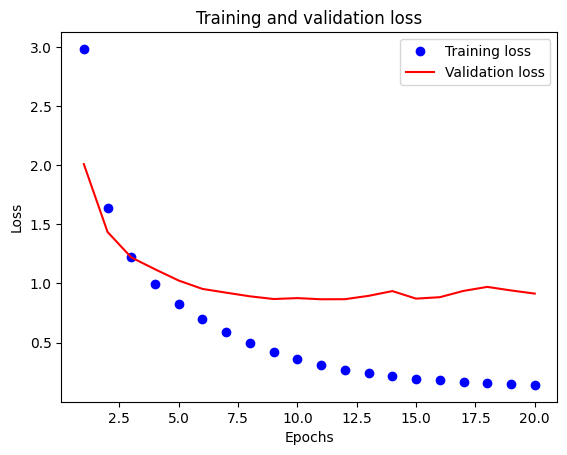

In [ ]:
epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r-', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

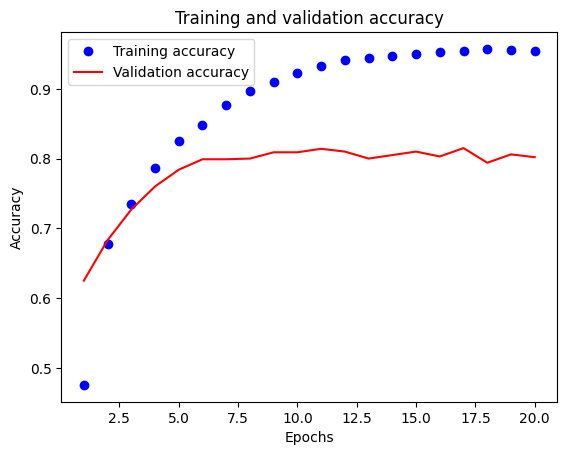

In [ ]:
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'r-', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [ ]:
# 검증 된 결과로 다시 학습 

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

history = model.fit(partial_x_train, 
                    partial_y_train,
                    epochs=10,
                    batch_size=512,
                    validation_data=(x_val, y_val))

eval_result = model.evaluate(x_test, one_hot_test_labels)
print(eval_result)

Epoch 1/10
16/16 [==============================] - 2s 84ms/step - loss: 2.8023 - accuracy: 0.5029 - val_loss: 1.8616 - val_accuracy: 0.6220
Epoch 2/10
16/16 [==============================] - 3s 168ms/step - loss: 1.5533 - accuracy: 0.6800 - val_loss: 1.4043 - val_accuracy: 0.6990
Epoch 3/10
16/16 [==============================] - 2s 133ms/step - loss: 1.1858 - accuracy: 0.7477 - val_loss: 1.1974 - val_accuracy: 0.7420
Epoch 4/10
16/16 [==============================] - 1s 59ms/step - loss: 0.9697 - accuracy: 0.7883 - val_loss: 1.1334 - val_accuracy: 0.7350
Epoch 5/10
16/16 [==============================] - 1s 60ms/step - loss: 0.8085 - accuracy: 0.8267 - val_loss: 1.0317 - val_accuracy: 0.7770
Epoch 6/10
16/16 [==============================] - 1s 60ms/step - loss: 0.6717 - accuracy: 0.8596 - val_loss: 0.9827 - val_accuracy: 0.7880
Epoch 7/10
16/16 [==============================] - 1s 59ms/step - loss: 0.5626 - accuracy: 0.8839 - val_loss: 0.9453 - val_accuracy: 0.8010
Epoch 8/10
